# FORESEE - Two Higgs Doublet Model (2HDM)

**Clone(FORESEE Models: Dark Higgs)**

**Structure Redone For Point-By-Point**

## Load Libraries 

In [1]:
import numpy as np
import sys
import os
src_path = "../../"
sys.path.append(src_path)
#from src.foresee import Foresee, Utility, Model #
from src.foresee_pbp import Foresee, Utility, Model
from matplotlib import pyplot as plt
import time
import warnings
import csv

In [2]:
if False: warnings.filterwarnings('once')

## 1. Specifying the Model

The phenomenology of the 2HDM, both cp-even $H$ and cp-odd $A$ non-SM Higgs can be the light long-lived scalar.


In [3]:
energy = "13.6"
# modelname = "2HDM"
modelname="NMSSM"
confignum="F2Ds1" #011y send coupling=1,acomp=1 for the llp spectrum, then in get events send correct vals, incorporate acomp into get production scaling therefore want an Acomp_ref (default as 1)
# now currently using 011y to just test mhpm AND acomp integration using just the 5 -5 modes (since unsure how to best integrate into s-dA formula and the mixing ones)
# z direct copy of y --> 011z currently each pt up to 1 GeV, every 50 up to 3
#"2HDM" for weis data
#"F2DO1" for FORESEE2D first test
#"F2DO2" for FORESEE2Dv2 , more fixed params
configuration=f"{modelname}_{confignum}"
model = Model(modelname, path="./")

**Production** The A  is mainly produced in 

\begin{equation}
\sigma(A) = O_{A\pi}^2 \sigma(\pi^0) +O_{A\eta}^2 \sigma(\eta)+O_{A\eta'}^2 \sigma(\eta')
\end{equation}

In addition, the scalar can also be produced in weak decays of SM mesons, in particular $K \to \pi A$ and $B \to X_s A$.

the flavour changing 2-body decay of $b$-quarks $b \to X_s \phi$. This process includes all b-flavoured hadrons and all strange-flavored decay products. For this we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. 

\begin{equation}
\Gamma(B\to X_s A) = 2 \Gamma_0\, \frac{m_b^3}{m_B^3}
  \bigg(1-\frac{m_{A}^2}{m_b^2}\bigg)\,. \\
\end{equation}

\begin{equation}
\Gamma_0 = \frac{G_F^3 |V_{ts}^* V_{tb}|^2}{\sqrt2\, 2^{8}\, \pi^5}\, m_t^4\,
  m_B^3 \big(X_1\cot\beta + X_2\cot^3\beta\big)^2 ,
\end{equation}


\begin{equation}
\begin{aligned}
X_{1}\left(m, m_{H^\pm}, m_{\mathrm{w}}\right)=&\left(\frac{m_{\mathrm{w}}^{2}-\frac{1}{2} m^{2}}{m_{\mathrm{w}}^{2}-m^{2}}\right)\left(\frac{m_{\mathrm{w}}^{2}}{m_{\mathrm{w}}^{2}-m^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m^{2}}\right)-1\right) \\
&+\frac{2 m_{\mathrm{w}}^{2}}{m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}}\left(\frac{m_{H^\pm}^{2}}{m_{H^\pm}^{2}-m^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)-\frac{m_{\mathrm{w}}^{2}}{m_{\mathrm{w}}^{2}-m^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m^{2}}\right)\right) \\
&+\frac{1}{2}\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(\frac{-m_{H^\pm}^{2}}{\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)}\right.\\
&+\frac{m_{\mathrm{w}}^{2} m_{H^\pm}^{2}}{\left(m_{\mathrm{w}}^{2}-m^{2}\right)\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m_{H^\pm}^{2}}\right) \\
&+\frac{m_{H^\pm}^{2} m^{2}}{\left(m_{\mathrm{w}}^{2}-m^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)+\frac{1}{2} \frac{m^{2}}{\left(m_{\mathrm{w}}^{2}-m^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)} \\
&+\frac{1}{2} \frac{m_{\mathrm{w}}^{4}}{\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(m_{\mathrm{w}}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m^{2}}\right) \\
&\left.-\frac{1}{2} \frac{m_{H^\pm}^{4}}{\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)\right),
\end{aligned}
\end{equation}

\begin{equation}
X_{2}\left(m, m_{H^\pm}, m_{\mathrm{W}}\right)=\frac{1}{2} m^{2}\left(\frac{1}{m_{H^\pm}^{2}-m^{2}}-\frac{m_{H^\pm}^{2}}{\left(m_{H^\pm}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)\right)
\end{equation}



More details about the Br are at draft

\begin{equation}
% \begin{aligned}
\Gamma^{K^+}_0 = \frac{G_F^3 m_{K^+}^3}{\sqrt2\, 2^{8}\, \pi^5}\Big(m_t^2\,|V_{td}^* V_{ts}|\big(X_1\cot\beta + X_2\cot^3\beta\big)+m_c^2\,|V_{cd}^* V_{cs}|\big(X_1\cot\beta + X_2\cot^3\beta\big)\Big)^2
% \end{aligned}
\end{equation}

the $K^+\to \pi^+ A$ decay rate is given by
\begin{equation}
\Gamma(K^+\to \pi^+ A) = \Gamma_0\,
  \frac{\lambda_\pi (m_{K^+}^2-m_\pi^2)^2}{m_{K^+}^6}\, \big[f^{K^+}_0(m_{A^0}^2)\big]^2 .
\end{equation}

\begin{equation}
\mathcal{M}\left(K_{L} \rightarrow \pi^{0} A\right)=-\operatorname{Re} \mathcal{M}\left(K^{+} \rightarrow \pi^{+} A\right)
\end{equation}

$\Gamma(K^+)_{\rm Total}=\frac{1}{\tau}=\frac{6.58*(10^-25)}{1.2380*10^-8}$
$\Gamma(K^0)_{\rm Total}=\frac{1}{\tau}=\frac{6.58*(10^-25)}{5.116*10^-8}$




**BELOW**

Adding production BR formulae incorporating $Acomp$ and $m_{H^\pm}$

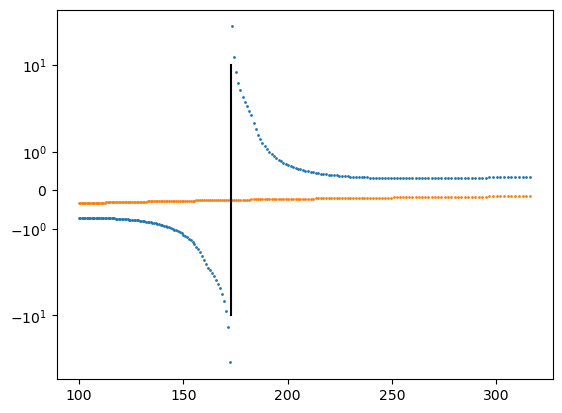

In [4]:
dos = lambda a,b : a**2 - b**2
ln = lambda x : np.log(x)

mt = 172.69
mw = 80.377
# print(mt**2) # 29821.8361
# print(mw**2) # 6460.462129
# print(mw**4) # 41737570.9202432
# print(41737570.9202432/2) # 20868785.4601216
# print(6460.462129/(mw**2-mt**2)) # -0.27654461321580626
# print(mt**2/(mw**2-mt**2)) # -1.2765446132158063
# print(.5*mt**2/(mw**2-mt**2)) # -0.6382723066079031
# print(20868785.4601216/(mw**2-mt**2)**2*np.log(mw**2/mt**2)) # -0.058487257548022836
X1 = lambda mhpm : (-0.20872192322244973 + 2*6460.462129/(6460.462129-mhpm**2)*(mhpm**2/(mhpm**2-29821.8361)*np.log(mhpm**2/29821.8361)-0.42298605543533996) + 0.5*(6460.462129-mhpm**2)*(-mhpm**2/(6460.462129-mhpm**2)/(mhpm**2-29821.8361)-0.27654461321580626*mhpm**2/(6460.462129-mhpm**2)**2*np.log(6460.462129/mhpm**2)+mhpm**2*(-1.2765446132158063)/(mhpm**2-29821.8361)**2*np.log(mhpm**2/29821.8361)-0.6382723066079031/(mhpm**2-29821.8361)-0.058487257548022836/(6460.462129-mhpm**2)-20868785.4601216/(6460.462129-mhpm**2)/(mhpm**2-29821.8361)**2*np.log(mhpm**2/29821.8361)))
X2 = lambda mhpm : (14910.91805*(1/(mhpm**2-29821.8361)-mhpm**2/(mhpm**2-29821.8361)**2*np.log(mhpm**2/29821.8361)))


x1list = [ X1(h) for h in np.logspace(2,2.5,200) ]
x2list = [ X2(h) for h in np.logspace(2,2.5,200) ]
plt.scatter(np.logspace(2,2.5,200),x1list,s=1)
plt.scatter(np.logspace(2,2.5,200),x2list,s=1)
plt.plot((mt,mt),(-10,10),'k')
plt.yscale("symlog")

In [5]:
# b to xs A
model.add_production_2bodydecay(
    pid0 = "5",   
    pid1 = "321", #                                                     v 1/tanB = cotB            v (1/tanB)3 = cot3B
    #br = "2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*(-0.676852*1/coupling - 0.331225*pow((1/coupling),3))**2",
    br = "Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*((-0.20872192322244973 + 2*6460.462129/(6460.462129-mHpm**2)*(mHpm**2/(mHpm**2-29821.8361)*np.log(mHpm**2/29821.8361)-0.42298605543533996) + 0.5*(6460.462129-mHpm**2)*(-mHpm**2/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)-0.27654461321580626*mHpm**2/(6460.462129-mHpm**2)**2*np.log(6460.462129/mHpm**2)+mHpm**2*(-1.2765446132158063)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)-0.6382723066079031/(mHpm**2-29821.8361)-0.058487257548022836/(6460.462129-mHpm**2)-20868785.4601216/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*1/coupling - (14910.91805*(1/(mHpm**2-29821.8361)-mHpm**2/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*pow((1/coupling),3))**2)",
    # TI-2HDM times mean LLP doublet composition (square)
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
model.add_production_2bodydecay(
    pid0 = "-5",
    pid1 = "321",
    br = "Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*((-0.20872192322244973 + 2*6460.462129/(6460.462129-mHpm**2)*(mHpm**2/(mHpm**2-29821.8361)*np.log(mHpm**2/29821.8361)-0.42298605543533996) + 0.5*(6460.462129-mHpm**2)*(-mHpm**2/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)-0.27654461321580626*mHpm**2/(6460.462129-mHpm**2)**2*np.log(6460.462129/mHpm**2)+mHpm**2*(-1.2765446132158063)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)-0.6382723066079031/(mHpm**2-29821.8361)-0.058487257548022836/(6460.462129-mHpm**2)-20868785.4601216/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*1/coupling - (14910.91805*(1/(mHpm**2-29821.8361)-mHpm**2/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*pow((1/coupling),3))**2)",
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_b_xsA = lambda mass,coupling,Acomp : 1

# model.add_production_2bodydecay(
#     pid0 = "130",
#     # KaonL
#     pid1 = "111",
#     br = "Acomp*(0.00046552136954409264*np.sqrt(-0.0729*pow(mass,2)+pow(0.22938076-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2))",
#     generator = "Pythia8",#['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
#     energy = energy,
#     nsample = 10,
#     scaling = "manual",
# )
# br_k0_piA = lambda mass,coupling,Acomp : 1

# model.add_production_2bodydecay(
#     pid0 = "321",
#     # Kaon +
#     pid1 = "211",
#     br = "Acomp*(0.00011275973750744316*np.sqrt(-0.07795264*pow(mass,2)+pow(0.22454784-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2))",
#     generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
#     energy = energy,
#     nsample = 10,
#     scaling = "manual",
# )
# br_kc_piA = lambda mass,coupling,Acomp : 1

Ending production BR formulae incorporating $Acomp$ and $m_{H^\pm}$

**ABOVE**

Below Productions: Two Body Decays

# b to xs A
model.add_production_2bodydecay(
    pid0 = "5",   
    pid1 = "321", #                                                     v 1/tanB = cotB            v (1/tanB)3 = cot3B
    #br = "2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*(-0.676852*1/coupling - 0.331225*pow((1/coupling),3))**2",
    br = "Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*(-0.676852*1/coupling - 0.331225*pow((1/coupling),3))**2)",
    # TI-2HDM times mean LLP doublet composition (square)
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
model.add_production_2bodydecay(
    pid0 = "-5",
    pid1 = "321",
    br = "Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*(-0.676852*1/coupling - 0.331225*pow((1/coupling),3))**2)",
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_b_xsA = lambda mass,coupling,Acomp : Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*(-0.676852*1/coupling - 0.331225*pow((1/coupling),3))**2)

model.add_production_2bodydecay(
    pid0 = "130",
    # KaonL
    pid1 = "111",
    br = "Acomp*(0.00046552136954409264*np.sqrt(-0.0729*pow(mass,2)+pow(0.22938076-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2))",
    generator = "Pythia8",#['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_k0_piA = lambda mass,coupling,Acomp : Acomp*((0.00046552136954409264*np.sqrt(-0.0729*pow(mass,2)+pow(0.22938076-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2))*((1+(.4-mass)/abs(.4-mass))/2))

model.add_production_2bodydecay(
    pid0 = "321",
    # Kaon +
    pid1 = "211",
    br = "Acomp*(0.00011275973750744316*np.sqrt(-0.07795264*pow(mass,2)+pow(0.22454784-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2))",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_kc_piA = lambda mass,coupling,Acomp : Acomp*(0.00011275973750744316*np.sqrt(-0.07795264*pow(mass,2)+pow(0.22454784-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2)*((1+(.4-mass)/abs(.4-mass))/2))

\begin{equation}
\sigma(A) = O_{A\pi}^2 \sigma(\pi^0) +O_{A\eta}^2 \sigma(\eta)+O_{A\eta'}^2 \sigma(\eta')
\end{equation}

The mixing coefficient $O_{Ai}$ is typically small, except in the resonance region when $m_A\sim m_i$ for $i=\pi_3, \eta,$ and $\eta^\prime$.  The approximate expressions for them are
\begin{equation}
    \begin{aligned}
        &O_{AA}\approx 1,\\
        & O_{A3}\approx\frac{\delta m_3^2}{\bar m_A^2-m_\pi^2},\\
        &O_{A\eta}\approx\frac{\cos\theta_\eta\delta m_8^2-\sin\theta_\eta\delta m_9^2}{\bar m_A^2-m_\eta^2},\\
        &O_{A\eta'}\approx\frac{\sin\theta_\eta \delta m_8^2+\cos\theta_\eta \delta m_9^2}{\bar m_A^2-m_{\eta'}^2}.
    \end{aligned}
\end{equation}
 

model.add_production_mixing(
    pid = "111",
    #OA3
    mixing = "Acomp*abs(2.5299704854937066e-6*(1/coupling)/((-0.018225 + 1.04506e-9j) + mass**2 + 4.26526e-9*(1/mass**2*240263*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)])+1/mass**2*162.0*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2 ))",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    scaling = "manual",
)
mixing_pi = lambda mass,coupling,Acomp : Acomp*(abs(2.5299704854937066e-6*(1/coupling)/((-0.018225 + 1.04506e-9j) + mass**2 + 4.26526e-9*(1/mass**2*240263*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)])+1/mass**2*162.0*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2 )))

model.add_production_mixing(
    pid = "221",
    #eta
    mixing = "Acomp*abs((0.000104111*(1/coupling) +0.0721595*( -0.0000822417*(1/coupling)+0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/( (-0.300304 + 7.21168e-7j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2))",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    scaling = "manual",
)
mixing_eta = lambda mass,coupling,Acomp : Acomp*(abs((0.000104111*(1/coupling) +0.0721595*( -0.0000822417*(1/coupling)+0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/( (-0.300304 + 7.21168e-7j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2)))

model.add_production_mixing(
    pid = "331",
    #etap
    mixing = "Acomp*abs((-7.53224e-6*(1/coupling) +0.997393*( -0.0000822417*(1/coupling) + 0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/(    (-0.737881 + 0.000176632j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2))",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    scaling = "manual",
)
mixing_etap = lambda mass,coupling,Acomp : Acomp*(abs((-7.53224e-6*(1/coupling) +0.997393*( -0.0000822417*(1/coupling) + 0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/(    (-0.737881 + 0.000176632j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2)))


Below Productions: Three Body Decays

model.add_production_3bodydecay(
    label= "5_di",
    pid0 = "5",
    pid1 = "321",
    pid2 = "0",
#    br = "6.83689*e-7",
    #br = "6.83689e-7",
    br = "(Acomp)**2*(np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(2.4921956740972477e-6 + 7.131806947234633e-7*pow(mass,2) - 4.898106921019186e-8*pow(mass,4)) + pow(mass,2)*(-1.711633667336312e-6 + 1.9592427684076741e-7*pow(mass,2) - 1.1213358029850934e-8*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass))",
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
model.add_production_3bodydecay(
    label= "-5_di",
    pid0 = "-5",
    pid1 = "321",
    pid2 = "0",
#    br = "6.83689*e-7",
    #br = "6.83689e-7",
    br = "(Acomp)**2*(np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(2.4921956740972477e-6 + 7.131806947234633e-7*pow(mass,2) - 4.898106921019186e-8*pow(mass,4)) + pow(mass,2)*(-1.711633667336312e-6 + 1.9592427684076741e-7*pow(mass,2) - 1.1213358029850934e-8*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass))",
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_b_kAA = lambda mass,_,Acomp : (Acomp)**2*(np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(2.4921956740972477e-6 + 7.131806947234633e-7*pow(mass,2) - 4.898106921019186e-8*pow(mass,4)) + pow(mass,2)*(-1.711633667336312e-6 + 1.9592427684076741e-7*pow(mass,2) - 1.1213358029850934e-8*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass))

## three body production, ## commented out since Wei doesn't know about dealing with np.log bug
#model.add_production_3bodydecay(
#    label= "321_di",
#    pid0 = "321",
#    pid1 = "221",
#    pid2 = "0",
#    br = "(Acomp)**2*(-4.408930798760057e-24*np.sqrt(8649 - 4000000*pow(mass,2))*(-2.4935067e7 - 1.4415e10*pow(mass,2) + 2.e12*pow(mass,4)) - 9.481571610236682e-23*np.log*mass*(7.4805201e7 - 1.7298e10*pow(mass,2) + 2.e12*pow(mass,4))*(93 + np.sqrt(8649 - 4000000*pow(mass,2))))",
#    generator = "Pythia8",
#    energy = energy,
#    nsample = 10,
#    scaling = "manual",
#)
#model.add_production_3bodydecay(
#    label= "-321_di",
#    pid0 = "-321",
#    pid1 = "221",
#    pid2 = "0",
#    br = "(Acomp)**2*(-4.408930798760057e-24*np.sqrt(8649 - 4000000*pow(mass,2))*(-2.4935067e7 - 1.4415e10*pow(mass,2) + 2.e12*pow(mass,4)) - 9.481571610236682e-23*np.log*mass*(7.4805201e7 - 1.7298e10*pow(mass,2) + 2.e12*pow(mass,4))*(93 + np.sqrt(8649 - 4000000*pow(mass,2))))",
#    generator = "Pythia8",
#    energy = energy,
#    nsample = 10,
#    scaling = "manual",
#)
br_k_etaAA = lambda mass,_,Acomp : (Acomp)**2*(-4.408930798760057e-24*np.sqrt(8649 - 4000000*pow(mass,2))*(-2.4935067e7 - 1.4415e10*pow(mass,2) + 2.e12*pow(mass,4)) - 9.481571610236682e-23*np.log*mass*(7.4805201e7 - 1.7298e10*pow(mass,2) + 2.e12*pow(mass,4))*(93 + np.sqrt(8649 - 4000000*pow(mass,2))))

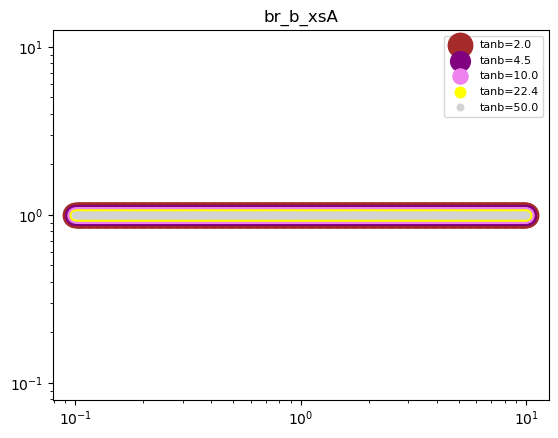

CPU times: total: 203 ms
Wall time: 230 ms


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
%%time
warnings.filterwarnings('ignore')
ms = [m for m in np.logspace(-1,1,401)]
cs = [c for c in np.logspace(np.log10(2),np.log10(50),5)]
A = 1
def doastackedplot(fn):
    plt.figure(fn)
    for i,c in enumerate(cs):
        y = list()
        for m in ms:
            y.append(eval(fn)(m,c,A))
        plt.scatter(ms,y,color=["lightgray","yellow","green","violet","blue","purple","red","brown","black"][int(9*(len(cs)-i-1)/len(cs))],
                    label="tanb={:.1f}".format(c),s=10+300*((len(cs)-i)/len(cs))**2)
    plt.legend(fontsize=8)
    plt.title(fn)
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

for br_expr in ["br_b_xsA","br_k0_piA","br_kc_piA","mixing_pi","mixing_eta","mixing_etap"]: # ["br_k_etaAA"]
    try:
        doastackedplot(br_expr)
    except: pass
warnings.filterwarnings('once')

**Decay:** 2HDM LightA uses a Lifetime block and a Branching Fraction block.

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. 

Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [7]:
model.set_ctau_pbp(
    filename=f"model/NMSSM_ctau2D_{confignum}.txt"
)

**Branching Fractions:** For most models, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and brnaching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [8]:
decay_modes = ["e_e","K_K_pi","K_K","mu_mu","other_hadrons","pi+_pi-_pi0","pi+_pi-","pi0_gamma","tau_tau"]
###         ^ these are the files I see in model/br/<mode>.txt

model.set_br_1d(
    modes = decay_modes,
    finalstates=[[11,-11,], None, [321,-321], [13,-13], None, None, [211,-211], [111,22], None, [15,-15]],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

We can now initiate FORESEE with the model that we just created. 

In [9]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)
model.set_gammas() # i just have to do this too

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{\phi}=1.5$ GeV and $\theta=10^{-4}$ and export events as a HEPMC file. 

In [10]:
mass, coupling = 0.160931, 4.03942#,2.5],[1e3,1e6]
# mass,coupling=0.149843, 4.01681
# mass,coupling = 0.145, 388.124
mass,coupling=0.119699, 2.37339
Acomp = 1e0
mHpm = 500


First, we will produce the corresponding flux for this mass and a reference coupling $\theta_{ref}=1$.

Evaluating (m, c) of (0.119699, 2.37339)
save data to file: ./model/LLP_spectra/13.6TeV_5_Pythia8_m_0.119699.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5_Pythia8_m_0.119699.npy


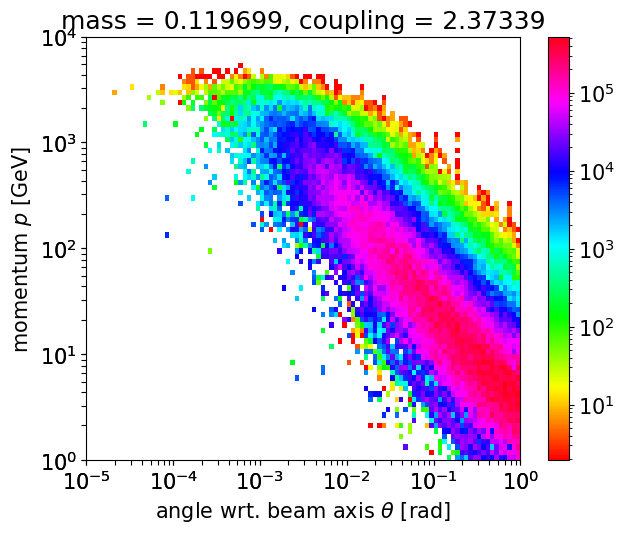

In [11]:
if type(mass) in [float, int]: mass = [mass]
if type(coupling) in [float, int]: coupling = [coupling]
model.set_gammas()
for m in mass:
    for coup in coupling:
        print("Evaluating (m, c) of ({}, {})".format(m, coup))
        plot,gamma_list=foresee.get_llp_spectrum(mass=m, coupling=coup, Acomp=Acomp, mHpm=mHpm, do_plot=True)
        plot.title("mass = {}, coupling = {}".format(m, coup))
        del plot

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER2 at the FPF. 

In [12]:
foresee.set_detector(
    #distance=620, 
    distance=480,
    selection="np.sqrt(x.x**2 + x.y**2)<1", 
    length=5, #wei's is 5, mine 10
    luminosity=3000, 
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [13]:
%%time

mass, coupling = 0.160931, 4.03942
# mass,coupling = 0.145, 388.124
# mass,coupling=0.149843, 4.01681
mass,coupling=0.119699, 2.37339
Acomp = 1e0
mHpm = 500

setupnames = [#'EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5',
              'PYTHIA_pT=1'
             ]
modes = {'5': ['Pythia8'],                                       # O(e60)
         '-5': ['Pythia8'],                                      # O(e60) 
        
        #  '130': ['Pythia8'],                                    # O(e60)
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],      # O(e60)
        #  '321': ['Pythia8'],                                    # O(e60)
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],      # O(e60) 
        #  '111': ['Pythia8'],                                    # O(e2) which is weird
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],      # O(e2)
        #  '221': ['Pythia8'],                                    # O(e8)
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],      # O(e8)
        #  '331': ['Pythia8'],                                    # O(e9)
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],      # O(e9)
        #  '5_di': ['Pythia8'],                                    # O(e2)
        # '-5_di': ['Pythia8'],                                   # O(e2)
         
         #'321_di': ['Pythia8'],                                  # zero sum(weights) err
         #'-321_di': ['Pythia8']                                  # zero sum(weights) err
}

#decay_modes = ["e_e","K_K_pi","K_K","mu_mu","other_hadrons","pi+_pi-_pi0","pi+_pi-","pi0_gamma","tau_tau"]
#finalstates=[[11,-11,], None, [321,-321], [13,-13], None, None, [211,-211], [111,22], None, [15,-15]],
####

momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    Acomp = Acomp,
    mHpm = mHpm,
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    weightnames=setupnames,
    modes=modes, 
)
######### in the get production scaling method might need to invert the num/den so that when tanB goes up the prod scaling doesnt go sky high and obeys the behavior of the cotB
for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))
    ##
    print("min: {:.2e}\tmed: {:.2e}\tmean: {:.2e}\tmax: {:.2e}".format(  np.min(weights[:,isetup]), 
                                                         np.median(weights[:,isetup]), 
                                                         np.mean(weights[:,isetup]), 
                                                         np.max(weights[:,isetup])),
         "\n________________________________________________________")

C:\Users\Wolfgang\FORESEE-main\FORESEE-main\Models\NMSSM\../..\src\foresee_pbp.py:385: DeprecationWarning: invalid escape sequence '\{'
  print("   ^^\{coup\}:",self.production[key]["br"], {"coupling":coupling}     )


IndexError: index 0 is out of bounds for axis 0 with size 0

Let us plot the resulting energy distribution

NameError: name 'momenta' is not defined

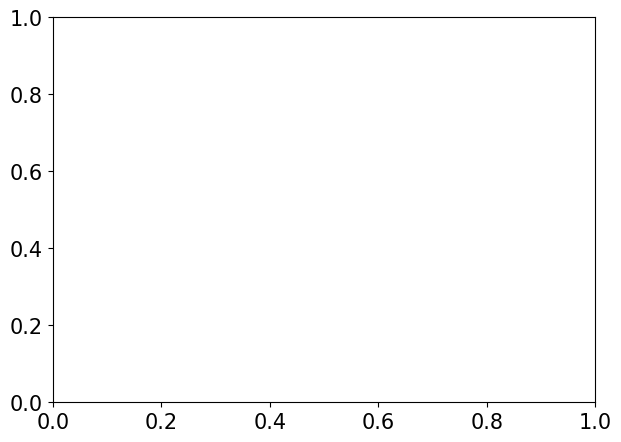

In [14]:
%%time
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper left')
plt.show()

## 3. Sensitivity Reach

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

1
CPU times: total: 0 ns
Wall time: 9.51 ms


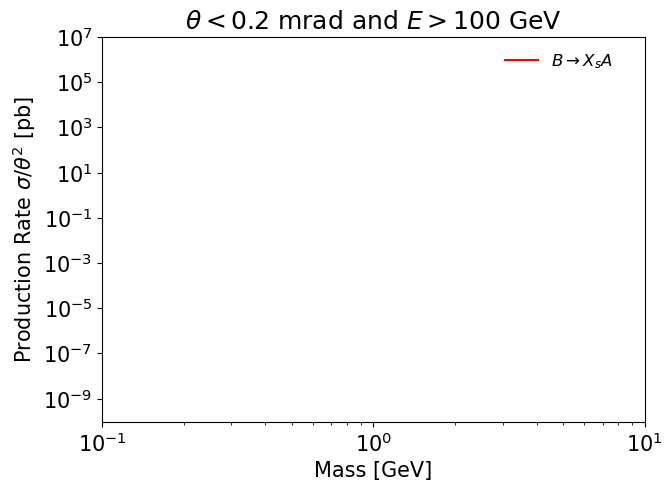

In [15]:
%%time
productions=[
   # TWO BODY DECAY PRODUCTIONS
     {"channels": ["5","-5"]                          , "color": "red"   , "label": r"$B \to X_s A$"      , "generators": ["Pythia8"]},
     # {"channels": ["130","321"]                       , "color": "green" , "label": r"$K \to \pi A$"      , "generators": ["Pythia8"]},#['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8']},
   # MESON MIXING PRODUCTIONS
     # {"channels": ["111","221","321"]                 , "color": "pink"  , "label": r"$mixing \to A$"     , "generators": ["Pythia8"]},#['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8']},
   # THREE BODY DECAY PRODUCTIONS (Just b -> K A A)
     # {"channels": ["5_di","-5_di"] , "color": "blue"  , "label": r"$B \to X_s AA$"     , "generators": ["Pythia8"]}
   # THREE BODY DECAY PRODUCTIONS (including the unknown one)
     #{"channels": ["5_di","-5_di","321_di","-321_di"] , "color": "blue"  , "label": r"$B \to X_s AA$"     , "generators": ["Pythia8"]}
]
event_masses=model.get_mt()['mass']
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%1==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%10==0 and 1<event_masses[i] and event_masses[i]<=3)] # ~11min for spectra , 77 min for res up to here @50 // @10? prospective 4.5 hours
#                     +[i for i in range(len(event_masses)) if (i%12300000==0 and 3<event_masses[i])]
# )

use_these_indices = ([i for i in range(len(event_masses)) if (i%1e50==0)]
)
print(len(use_these_indices))

masses=[event_masses[i] for i in use_these_indices[::1]]
cmap_arr = model.get_Acomp()
plot=foresee.plot_production_pbp(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.1,10],#ylims=[1e-7,1e7],
    ylims=[9e-11,1e7],
    xlabel=r"Mass [GeV]",
    ylabel=r"Production Rate $\sigma/\theta^2$ [pb]",
    title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=2
)

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER2 configuration, which we set up before.

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

> ## Below here is the short block to which I want to condense the point-by-point work.

In [16]:
setupnames = [#'EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5',
              'PYTHIA_pT=1'
]
list_nevents = {label:[] for label in setupnames}

modes = {'5': ['Pythia8'],
         '-5': ['Pythia8'], 
         
        #  '130': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
        #  '321': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
        #  '111': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
        #  '221': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
        #  '331': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
        #  '5_di': ['Pythia8'],
        # '-5_di': ['Pythia8'],
         
         #'321_di': ['Pythia8'], 
         #'-321_di': ['Pythia8']
}
model.set_gammas()
mt = model.get_mt()
event_masses = mt['mass']
event_tanbs = mt['tanb']
event_Acomps = model.get_Acomp()
event_mHpms = model.get_mHpm()

# use_these_indices = ([i for i in range(len(event_masses)) if (event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%8==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%100==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%50000==0 and 3<event_masses[i])])
# # bout an hour each
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%1==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1230000==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%12300000==0 and 3<event_masses[i])]
# )
# # # 15 sec ea
# use_these_indices = ([i for i in range(len(event_masses)) if (i%50==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%500==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1110000==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%11100000==0 and 3<event_masses[i])]
# )
# # # 5 min
# use_these_indices = ([i for i in range(len(event_masses)) if (i%2==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%100==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1110000==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%11100000==0 and 3<event_masses[i])]
# )
# # bout ~ 
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%1==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%10==0 and 1<event_masses[i] and event_masses[i]<=3)] # ~11min for spectra , 77 min for res up to here @50 // @10? prospective 4.5 hours
#                     +[i for i in range(len(event_masses)) if (i%12300000==0 and 3<event_masses[i])]
# )
# # FORESEE2D F2D01
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=1)]
#                      +[i for i in range(len(event_masses)) if (i%5==0 and 1<event_masses[i] and event_masses[i]<=3)]
# )
# # FORESEE2D F2D02 # 0-1-3 % 1-5 takes 15 for spectra
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=1)]
#                      +[i for i in range(len(event_masses)) if (i%5==0 and 1<event_masses[i] and event_masses[i]<=3)] 
# )
# FORESEE2D F2D0x
use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=1)]
                    +[i for i in range(len(event_masses)) if (i%100==0 and 1<event_masses[i])]
)
# #for wei's 2HDM replication in this format, going to downres  A LOT since 2M points on that grid
# use_these_indices = ([i for i in range(len(event_masses)) if (i%400==0 and event_masses[i] <= 1.5)]
#                     +[i for i in range(len(event_masses)) if (i%800==0 and 1.5<event_masses[i] and event_masses[i]<=3)])
print(len(use_these_indices))


1189


In [17]:
%%time
print(f"YEAR-MO-DY HR-MN-SC       #  \tevent\tmass")
for j,i in enumerate(use_these_indices[:5000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl
    
for j,i in enumerate(use_these_indices[5000:10000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl   

for j,i in enumerate(use_these_indices[10000:15000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl

for j,i in enumerate(use_these_indices[15000:]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl
   
# model.write_gammas(configuration)

YEAR-MO-DY HR-MN-SC       #  	event	mass
2024-06-18 18:47:12       0  |	0     	0.100967
2024-06-18 18:47:13       1  |	1     	0.103182
2024-06-18 18:47:13       2  |	2     	0.106820
2024-06-18 18:47:13       3  |	3     	0.117559
2024-06-18 18:47:14       4  |	4     	0.118523
2024-06-18 18:47:14       5  |	5     	0.119826
2024-06-18 18:47:15       6  |	6     	0.123061
2024-06-18 18:47:15       7  |	7     	0.125132
2024-06-18 18:47:15       8  |	8     	0.130033
2024-06-18 18:47:16       9  |	9     	0.146993
2024-06-18 18:47:16      10  |	10    	0.151255
2024-06-18 18:47:17      11  |	11    	0.152149
2024-06-18 18:47:17      12  |	12    	0.154597
2024-06-18 18:47:17      13  |	13    	0.154713
2024-06-18 18:47:18      14  |	14    	0.156833
2024-06-18 18:47:18      15  |	15    	0.159160
2024-06-18 18:47:19      16  |	16    	0.159793
2024-06-18 18:47:19      17  |	17    	0.162781
2024-06-18 18:47:20      18  |	18    	0.163862
2024-06-18 18:47:20      19  |	19    	0.173533
2024-06-18 18:47:20

In [18]:
%%time
print(f"YEAR-MO-DY HR-MN-SC       #  \tevent\tmass\t\ttanb")
for j,i in enumerate(use_these_indices[:5000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])
for j,i in enumerate(use_these_indices[5000:10000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+5000: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])
for j,i in enumerate(use_these_indices[10000:15000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+10000: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])
for j,i in enumerate(use_these_indices[15000:]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+15000: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])


for label in setupnames: 
    result = np.array([event_masses,event_tanbs,list_nevents[label]], dtype='object') # different to how saved in lattice ver
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

YEAR-MO-DY HR-MN-SC       #  	event	mass		tanb
2024-06-18 18:55:19       0  |	0     	0.100967	26.6526
2024-06-18 18:55:19       1  |	1     	0.103182	7.72292
2024-06-18 18:55:20       2  |	2     	0.106820	9.30083
2024-06-18 18:55:20       3  |	3     	0.117559	9.46889
2024-06-18 18:55:20       4  |	4     	0.118523	6.23586
2024-06-18 18:55:21       5  |	5     	0.119826	4.55234
2024-06-18 18:55:21       6  |	6     	0.123061	3.75993
2024-06-18 18:55:21       7  |	7     	0.125132	9.34972
2024-06-18 18:55:22       8  |	8     	0.130033	9.34607
2024-06-18 18:55:22       9  |	9     	0.146993	4.2378
2024-06-18 18:55:22      10  |	10    	0.151255	8.59117
2024-06-18 18:55:22      11  |	11    	0.152149	22.9484
2024-06-18 18:55:23      12  |	12    	0.154597	40.6525
2024-06-18 18:55:23      13  |	13    	0.154713	5.41553
2024-06-18 18:55:23      14  |	14    	0.156833	15.4058
2024-06-18 18:55:24      15  |	15    	0.159160	21.1806
2024-06-18 18:55:24      16  |	16    	0.159793	25.4274
2024-06-18 18:55:24

> ## End point-by-point-specific block.

Specify the setups (filename in model/results, legend name, outline color, outline style, fill alpha, level).

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation) **UPDATE BOUNDS**

We then specify other projected sensitivitities (filename in model/bounds [ i think it's in /lines] directory, color, label, label position x, label position y, label rotation)

We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position)  

Finally, we can plot everything using `foresee.plot_reach()`.

In [19]:
setups = [
     # ["14TeV_default_23Mayall_nomixing.npy",    "FASER2 (nomix)"  , "red",         "solid", 0., 3],#higher
     # ["14TeV_default_100_5-5.npy",    "FASER2 (100 5-5)"  , "magenta",         "solid", 0., 3], #low reach

    [f"13.6TeV_NMSSM_{confignum}_PYTHIA_pT=1.npy"   , f"NMSSM{confignum}: 3"     , "black" ,  "solid"  , 0.05, 3],
    
]
bounds = [
    # ["bounds_MicroBoone.txt", "$\mu$BooNE"  , 0.110, 30, 90 ],
    # ["bounds_2010.07644.txt", "NA62 $\pi^+$", 0.140, 40, 90 ],
    # ["bounds_E949.txt"      , "E949"        , 0.160, 30,0 ],
    # ["bounds_1508.04094.txt", "LHCb $B^0$"  , 1.100, 21, 10 ],
    # ["bounds_2011.11329.txt", "NA62 $K^+$"  , 0.150, 35, 45 ],
    
    # ["charm-tanb3.txt",  "",  0.700, 1e4, 0  ],
    # ["charm-tanb3s.txt",  "CHARM",  0.500, 1e1, 15  ],
    
    # ["bounds_SN1987.txt"      , "SN1987"        , 0.110, 1.2e5, 0 ], 
    
    # ["bounds_SN.txt"      , "SN1987"        , 0.110, 1.2e5, 0 ], 
]
projections = [
    # ["limits_SHiP.txt",       "teal",         "SHiP"    , 0.130, 2.0*10**-5, 330  ],
    # ["limits_MATHUSLA.txt",   "dodgerblue",   "MATHUSLA", 0.120, 5.0*10**-6, 0  ],
    # ["limits_CodexB.txt",     "deepskyblue",  "CodexB"  , 1.700, 2.0*10**-5, 0  ],
    # ["limits_LHCb.txt",       "cyan",         "LHCb"    , 3.800, 1.0*10**-4, 0  ],
]
# branchings = [
#     ["e_e"         , "red"          , "solid" , r"ee"               , 0.110, 0.30],
#     ["mu_mu"       , "orange"       , "solid" , r"$\mu\mu$"         , 0.170, 0.10],
#     ["pi+_pi-"     , "blue"         , "solid" , r"$\pi^+\pi^-$"     , 0.225, 0.05],
#     ["pi0_gamma"   , "dodgerblue"   , "solid" , r"$\pi^0\gamma$"    , 0.580, 0.02],
#     ["pi+_pi-_pi0" , "cyan"         , "solid" , r"$\pi^0\pi^+\pi^-$", 0.389, 0.05],
#     ["K_K"         , "green"        , "solid" , r"$KK$"             , 1.150, 0.105], 
# ]
branchings = None

C:\Users\Wolfgang\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


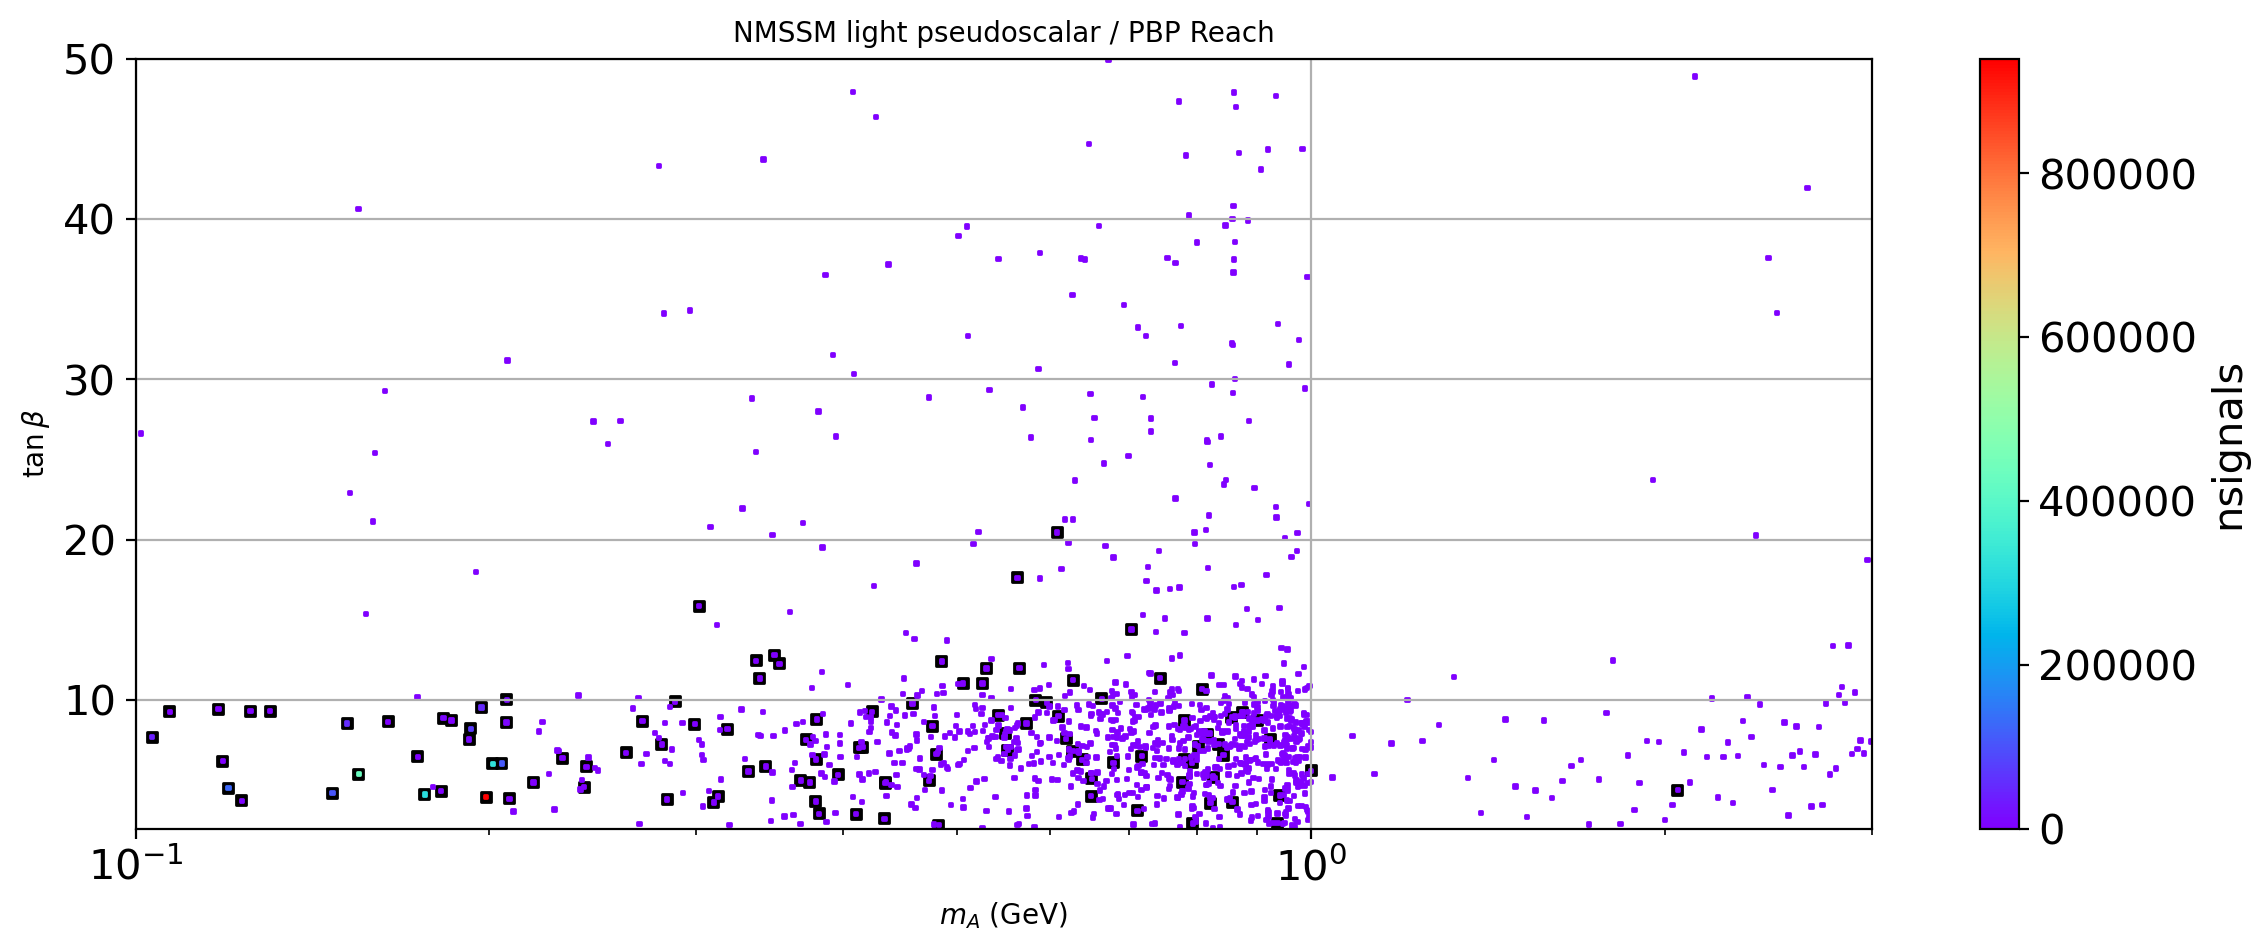

In [20]:
# plot_reach_pbp
for setup in [setups[0]]:
    plot, nsignals = foresee.plot_reach_pbp(
        setups=[setup],
        bounds=bounds,
        projections=projections,
        branchings=branchings,
        title=f"NMSSM light pseudoscalar / PBP Reach",
        xlims=[0.1,3], 
        ylims=[2,50],
        # ylims=[5e1,1e7],
        xlabel=r"$m_{A}$ (GeV)",  
        ylabel=r"$\tan\beta$",

        ptsize=1.5,
        dpi=200,
        xscale="log",
        yscale="linear",
        cnorm="linear",
        
        use_these_indices=use_these_indices,
        
        legendloc=(1.,0.95),
        figsize=(14,5),
    )
    plot.savefig("Reach_"+f"{modelname}pbp_{confignum}"+".png")
    plot.show()
    plot.close()

Number of candiate events: 113


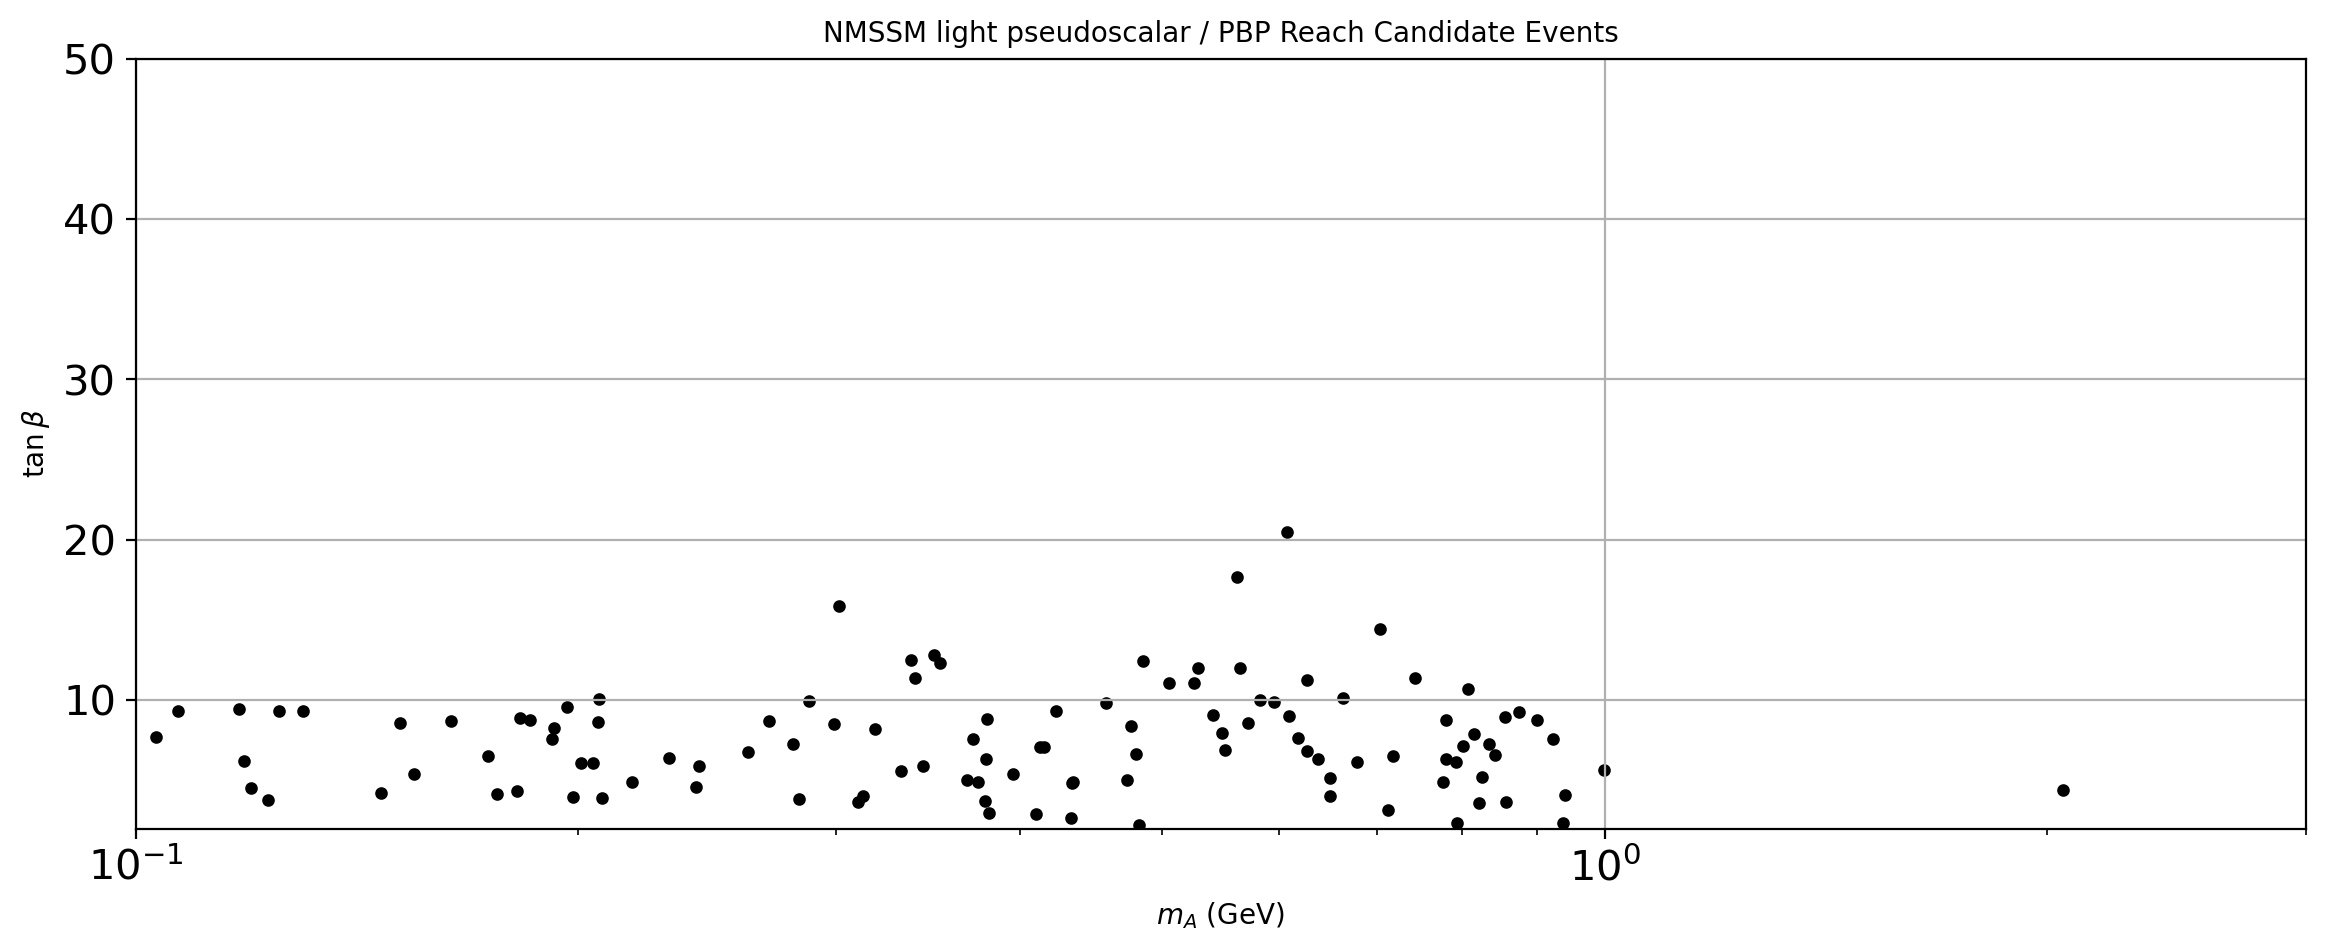

In [21]:
# plot_reach_pbp ACTUAL CANDIDATE events
for setup in [setups[0]]:
    plot = foresee.plot_reach_pbp_candidate(
        setups=[setup],
        bounds=bounds,
        projections=projections,
        branchings=branchings,
        title=f"NMSSM light pseudoscalar / PBP Reach Candidate Events",
        xlims=[0.1,3],         
        ylims=[2,50],
        # ylims=[5e1,1e7],
        xlabel=r"$m_{A}$ (GeV)",  
        ylabel=r"$\tan\beta$",

        ptsize=5,
        dpi=200,
        xscale="log",
        yscale="linear",
        cnorm="log",
        
        use_these_indices=use_these_indices,
        
        legendloc=(1.,0.95),
        figsize=(14,5),
    )
    plot.savefig("Reach_"+f"{modelname}pbp_{confignum}_candidates"+".png")
    plot.show()
    plot.close()

0


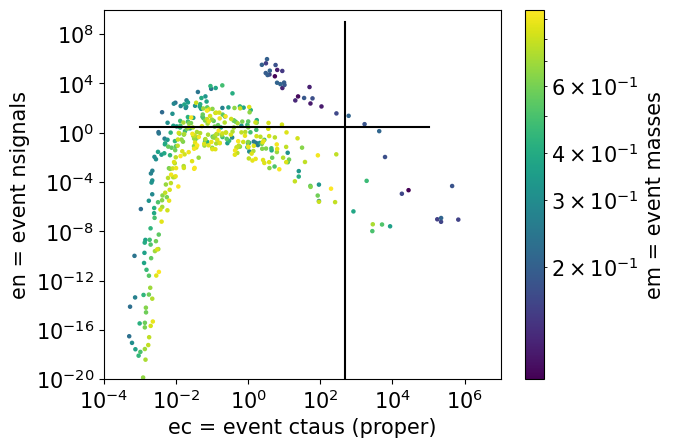

Loading 5 mode, m = 0.100967 @ 0.0000
Loading 5 mode, m = 0.334312 @ 2.7104
Loading 5 mode, m = 0.443554 @ 5.3491
Loading 5 mode, m = 0.535537 @ 7.9618
Loading 5 mode, m = 0.622096 @ 10.6990
Loading 5 mode, m = 0.684716 @ 13.4372
Loading 5 mode, m = 0.749296 @ 16.1425
Loading 5 mode, m = 0.803965 @ 18.8937
Loading 5 mode, m = 0.858428 @ 21.6390
Loading 5 mode, m = 0.909006 @ 24.3499
Loading -5 mode, m = 0.100967 @ 27.0762
Loading -5 mode, m = 0.334312 @ 29.8644
Loading -5 mode, m = 0.443554 @ 32.6546
Loading -5 mode, m = 0.535537 @ 35.4500
Loading -5 mode, m = 0.622096 @ 38.1240
Loading -5 mode, m = 0.684716 @ 40.8487
Loading -5 mode, m = 0.749296 @ 43.5462
Loading -5 mode, m = 0.803965 @ 46.2364
Loading -5 mode, m = 0.858428 @ 48.9984
Loading -5 mode, m = 0.909006 @ 51.7964


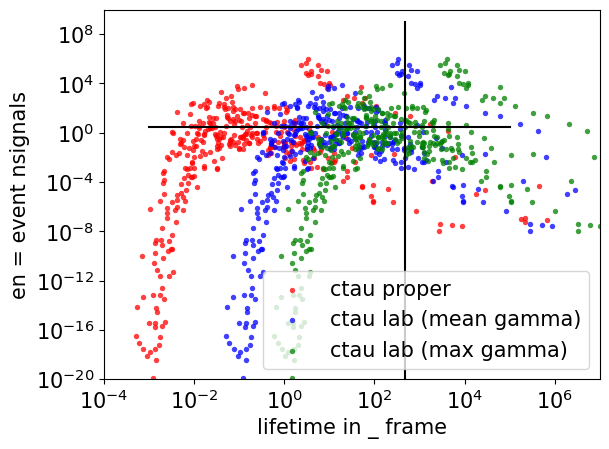

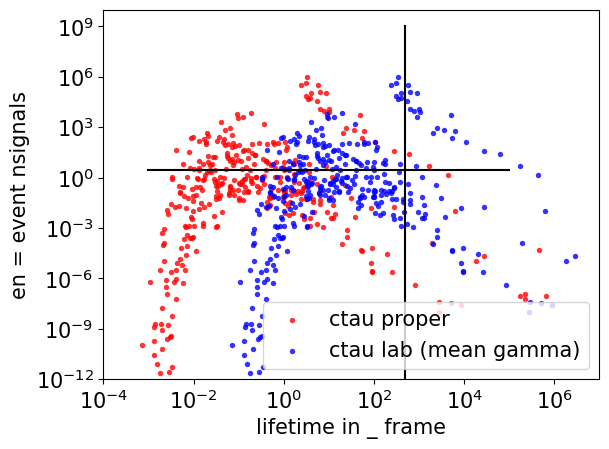

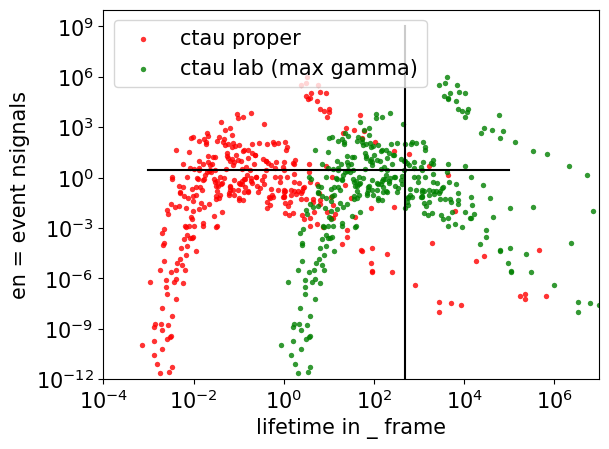

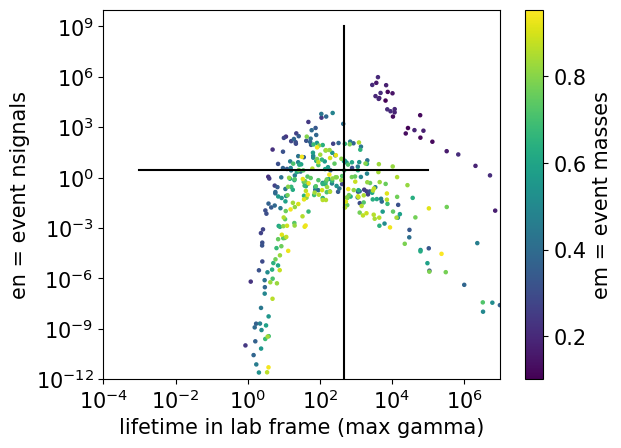

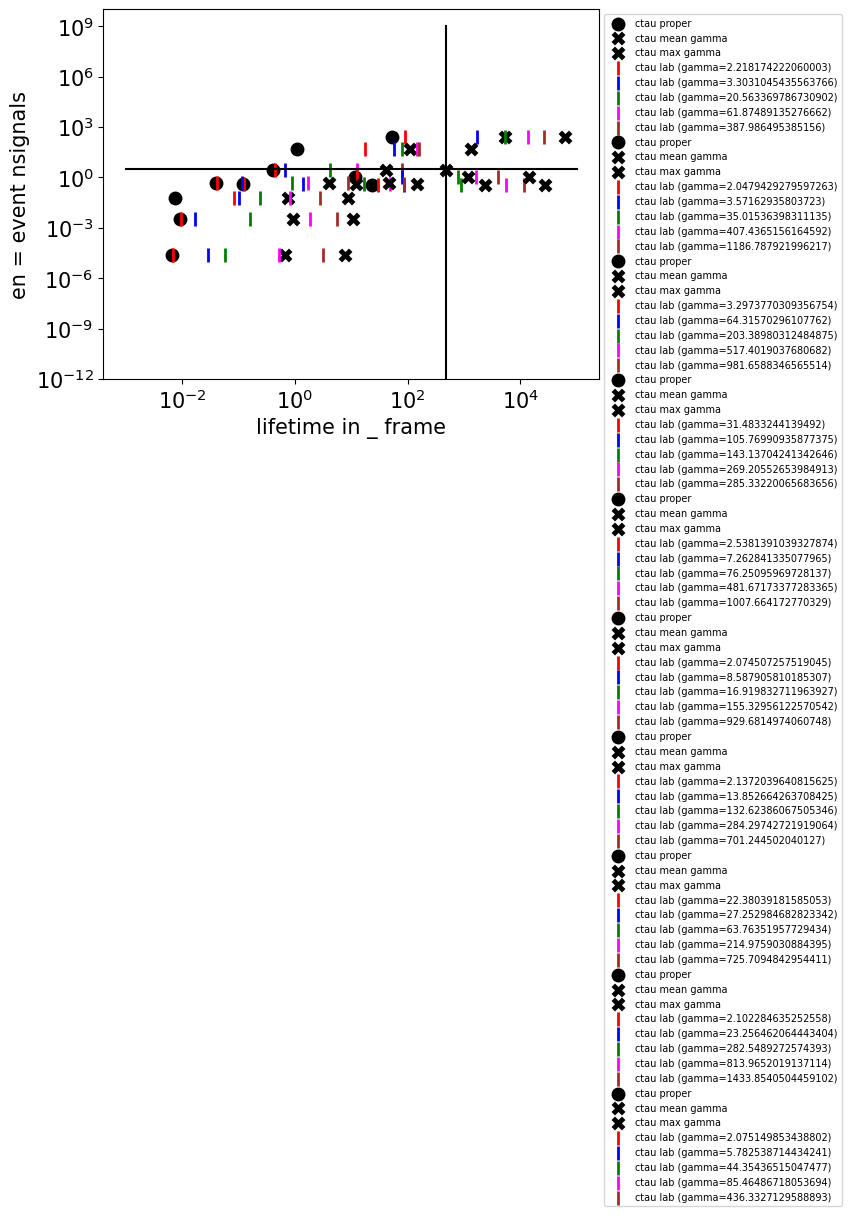

CPU times: total: 17.3 s
Wall time: 56.1 s


In [22]:
%%time
def gothere(n):
    print(n)
    return n+1
n=gothere(0)

MAXTB=50e100
MINNSIG=-1e-12
NSAMP=1e3# 1min/1k # 10k crashes the all of it ( when hanging onto all vals in file_gammas)
NSAMP=min(int(NSAMP),len(use_these_indices))
NEXTRAGAMS=5e0
NEXTRAGAMS=int(max(0,NEXTRAGAMS))

emlist=[]; mlabel="em = event masses"
etlist=[]; tlabel="et = event tanbs"
enlist=[]; nlabel="en = event nsignals"
eclist=[]; clabel="ec = event ctaus (proper)"
event_Acomps = model.get_Acomp()
event_mHpms = model.get_mHpm()
eAlist=[]; Alabel="eA = event Acomps"
eHlist=[]; Hlabel="eH = event mHpms"

for j,i in enumerate(use_these_indices[:NSAMP]):
    em=event_masses[i]
    et=event_tanbs[i]
    en=nsignals[j][0]
    ec=model.get_ctau(em,et)
    eA=event_Acomps[i]
    eH=event_mHpms[i]
    # if True:
    if en<MINNSIG or et>MAXTB: continue
    if True or en>1e-20:
        emlist.append(em)
        etlist.append(et)
        enlist.append(en)
        eclist.append(ec)
        eAlist.append(eA)
        eHlist.append(eH)
        if False and en>3e0:
            print(f"m {em:.6f}\tt {et:.6f}\tctau {ec:.3f}\tnsig {en:.1f}",end="\t")
            for k in range(int(np.log10(en))):
                print("*",end="")
            print()

plt.figure()
plt.scatter(eclist,enlist,c=emlist,norm="log",cmap="viridis",s=5)
plt.colorbar(label=mlabel)
plt.xlabel(clabel)
plt.ylabel(nlabel)
plt.xlim(1e-4,1e7)
plt.ylim(1e-20,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.show()
plt.close()

# plt.figure()
# plt.scatter(eAlist,enlist,c=emlist,norm="log",cmap="viridis",s=5)
# plt.colorbar(label=mlabel)
# plt.xlabel(Alabel)
# plt.ylabel(nlabel)
# plt.ylim(1e-20,1e10)
# plt.xscale("log")
# plt.yscale("log")
# plt.plot((1e-15,1e-2),(3,3),c="k")
# plt.show()
# plt.close()

startingloop=time.time()
associate_gammas = [[] for _ in use_these_indices[:NSAMP]]
for key in modes:
    for j,i in enumerate(use_these_indices[:NSAMP]):
        file_gammas=[]
        path=f"gammas/NMSSM_{key}_m_{event_masses[i]}_gammas.txt"
        DEBUG=(j%int(NSAMP/10)==0)
        try: # try load my gammas file
            # if DEBUG: print("load", path)
            if DEBUG: print(f"Loading {key} mode, m = {event_masses[i]} @ {time.time()-startingloop:.4f}")
            with open(path) as f:
                f_reader = csv.reader(f, delimiter=" ")
                for i,[r] in enumerate(f_reader):
                    file_gammas.append(float(r))
                f.close()
        except:
            if DEBUG: print("Warning: file ",path," not found")
            continue
        extra_gammas = [file_gammas[int(np.random.random()*len(file_gammas))] for _ in range(NEXTRAGAMS)]
        extra_gammas.sort()
        associate_gammas[j].append([np.mean(file_gammas),max(file_gammas)]+extra_gammas)
        # print(associate_gammas[j])
        
ecplist = [0 for _ in associate_gammas]
ecpplist = [0 for _ in associate_gammas]
ecxlist = [[0 for _i in range(NEXTRAGAMS)] for _j in associate_gammas]

cplabel="lifetime in lab frame (mean gamma)"
cpplabel="lifetime in lab frame (max gamma)"
cxlabel="lifetime in lab frame (specific gamma)"

for j,m_slice in enumerate(associate_gammas):
    for k_slice in m_slice:
        ecplist[j]+=k_slice[0]*eclist[j]/len(modes)
        ecpplist[j]+=k_slice[1]*eclist[j]/len(modes)
        for i in range(len(ecxlist[0])):
            ecxlist[j][i]+=k_slice[2+i]*eclist[j]/len(modes)

plt.figure()
plt.scatter(eclist,enlist,c="r",alpha=.75,s=15,lw=0,label="ctau proper")
plt.scatter(ecplist,enlist,c="b",alpha=.75,s=15,lw=0,label="ctau lab (mean gamma)")
plt.scatter(ecpplist,enlist,c="g",alpha=.75,s=15,lw=0,label="ctau lab (max gamma)")
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
plt.xlim(1e-4,1e7)
plt.ylim(1e-20,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend()
plt.show()
plt.close()

plt.figure()
plt.scatter(eclist,enlist,c="r",alpha=.8,s=15,lw=0,label="ctau proper")
plt.scatter(ecplist,enlist,c="b",alpha=.8,s=15,lw=0,label="ctau lab (mean gamma)")
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend()
plt.show()
plt.close()

plt.figure()
plt.scatter(eclist,enlist,c="r",alpha=.8,s=15,lw=0,label="ctau proper")
plt.scatter(ecpplist,enlist,c="g",alpha=.8,s=15,lw=0,label="ctau lab (max gamma)")
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend()
plt.show()
plt.close()
#////////////////////
plt.figure()
plt.scatter(ecpplist,enlist,c=emlist,norm="linear",cmap="viridis",s=5)
plt.colorbar(label=mlabel)
plt.xlabel(cpplabel)
plt.ylabel(nlabel)
plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.show()
plt.close()
#//////////////////// for only a few of the events, plot it and five (random picks) of its gamma values' effect

signal_events = [i for i,en in enumerate(enlist) if en>max(0,1e-12)]
rand_events = [signal_events[int(np.random.random()*len(signal_events))] for i in range(10)] #10 random signal events

# print(signal_events)
# print()
# print(rand_events)
# print()

colors = ["r","b","g","magenta","brown","yellow","teal","lightgray","darkgray","orange","pink"]
markers = ["|"]#["X","v","o","D"]
plt.figure()
for indexoftheindex,rand_event_index in enumerate(rand_events):
    # plt.figure()
    
    # print(rand_event_index,eclist[rand_event_index],enlist[rand_event_index])
    
    plt.scatter(eclist[rand_event_index],enlist[rand_event_index],c="k",alpha=1,s=100,lw=0,label="ctau proper")
    plt.scatter(ecplist[rand_event_index],enlist[rand_event_index],c="k",alpha=1,marker="X",s=100,lw=0,label="ctau mean gamma")
    plt.scatter(ecpplist[rand_event_index],enlist[rand_event_index],c="k",alpha=1,marker="X",s=100,lw=0,label="ctau max gamma")

    for ig,ecx in enumerate(ecxlist[rand_event_index]):
        relevant_gamma = ecx*len(modes)/eclist[rand_event_index]
        
        plt.scatter(ecx,
                    enlist[rand_event_index],
                    c=colors[ig%len(colors)],marker=markers[indexoftheindex%len(markers)],alpha=1,s=100,lw=2,label=f"ctau lab (gamma={relevant_gamma})")
        
    # plt.xlabel("lifetime in _ frame")
    # plt.ylabel("en = event nsignals")
    # # plt.xlim(1e-4,1e7)
    # plt.ylim(1e-12,1e10)
    # plt.xscale("log")
    # plt.yscale("log")
    # plt.plot((480,480),(MINNSIG,1e9),c="k")
    # plt.plot((1e-3,1e5),(3,3),c="k")
    # plt.legend(fontsize=7,loc='upper left', bbox_to_anchor=(1., 1., 0., 0.))
    # plt.show()
    # plt.close()
    
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
# plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend(fontsize=7,loc='upper left', bbox_to_anchor=(1., 1., 0., 0.))
plt.show()
plt.close()